# **RECOMPRA EM E-COMMERCE: ADABOOST**



### Instalação de bibliotecas

In [1]:
# Apenas a biblioteca shap precisa ser instalada; as demais utilizadas neste notebook já vêm pré-instaladas no Google Colab
! pip install shap

### Carregamento de bibliotecas

In [2]:
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import ensemble                                   # AdaBoost
from sklearn.model_selection import KFold, cross_validate      # Validação cruzada
from sklearn.model_selection import GridSearchCV               # Otimização de hiperparâmetros via grid search
from sklearn.model_selection import RandomizedSearchCV         # Otimização de hiperparâmetros via random search
import shap                                                    # Interpretabilidade de modelos de ML

/usr/local/lib/python3.9/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Leitura da base de dados

In [3]:
dados_ecommerce = pd.read_table("../Dados/Recompra_eCommerce.txt", sep = "\t")

### Visualização da base de dados

In [4]:
display(dados_ecommerce)

,ID_CLIENTE,IDADE,VALOR_COMPRA_SITE,QTDE_ITENS_COMPRA_SITE,FLAG_ACESSORIOS_COMPRA_SITE,FLAG_FEMININA_COMPRA_SITE,FLAG_MASCULINA_COMPRA_SITE,NOTA_SATISF_COMPRA_SITE,FLAG_COMPROU_LOJA_FISICA_6M,QTDE_COMPRAS_LOJA_FISICA_6M,QTDE_ITENS_LOJA_FISICA_6M,FLAG_RECOMPRA_PROX_3_MESES
0,1,29,185.5,2,0,1,0,7,1,4,4,1
1,2,27,215.5,2,0,1,1,7,1,2,2,1
2,3,29,106.4,4,0,1,0,10,1,1,5,1
3,4,18,140.2,1,0,1,0,8,1,1,4,0
4,5,24,72.9,2,0,1,0,7,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1269,1270,40,165.9,6,0,1,0,8,1,3,9,1
1270,1271,33,55.6,1,0,1,0,9,0,0,0,0
1271,1272,28,105.7,4,0,0,1,6,0,0,0,0
1272,1273,28,284.9,3,0,1,1,8,0,0,0,0


In [35]:
dados_ecommerce.describe()

,ID_CLIENTE,IDADE,VALOR_COMPRA_SITE,QTDE_ITENS_COMPRA_SITE,FLAG_ACESSORIOS_COMPRA_SITE,FLAG_FEMININA_COMPRA_SITE,FLAG_MASCULINA_COMPRA_SITE,NOTA_SATISF_COMPRA_SITE,FLAG_COMPROU_LOJA_FISICA_6M,QTDE_COMPRAS_LOJA_FISICA_6M,QTDE_ITENS_LOJA_FISICA_6M,FLAG_RECOMPRA_PROX_3_MESES,y_pred
count,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000
mean,637.500000,30.339089,209.753061,2.302983,0.213501,0.827316,0.650706,7.846939,0.552590,0.948195,2.031397,0.526688,0.412088
std,367.916431,7.943314,119.275819,1.356677,0.409939,0.378123,0.476934,1.557778,0.497422,1.277204,2.273994,0.499483,0.492404
min,1.000000,18.000000,21.800000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,319.250000,25.000000,122.150000,1.000000,0.000000,1.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,637.500000,29.000000,190.100000,2.000000,0.000000,1.000000,1.000000,8.000000,1.000000,1.000000,2.000000,1.000000,0.000000
75%,955.750000,34.000000,273.150000,3.000000,0.000000,1.000000,1.000000,9.000000,1.000000,1.000000,4.000000,1.000000,1.000000
max,1274.000000,74.000000,727.300000,10.000000,1.000000,1.000000,1.000000,10.000000,1.000000,12.000000,15.000000,1.000000,1.000000


### Separação de features e target

In [5]:
X = dados_ecommerce.drop(columns = ['FLAG_RECOMPRA_PROX_3_MESES', 'ID_CLIENTE'])
y = dados_ecommerce['FLAG_RECOMPRA_PROX_3_MESES']

### Criação de colunas dummy para variáveis explicativas qualitativas

In [6]:
# Não necessário para esta base de dados, pois todas as variáveis explicativas são quantitativas

### Modelo 1: AdaBoost com otimização de hiperparâmetros via validação cruzada, com grid search

In [7]:
# Grid de valores dos hiperparâmetros
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.5]
}

In [8]:
# Busca da melhor combinação de hiperparâmetros, via validação cruzada com grid search, com otimização de AUC e k = 10 (EXECUÇÃO ONEROSA)
adaboost = ensemble.AdaBoostClassifier(random_state = 123)
cv = KFold(n_splits = 10, shuffle = True, random_state = 123)
scoring = {'AUC': 'roc_auc', 'balanced_accuracy': 'balanced_accuracy', 'recall': 'recall'}
grid_search = GridSearchCV(adaboost, param_grid, cv = cv, scoring = scoring, refit = 'AUC')
grid_search.fit(X, y)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.9/dis

GridSearchCV(cv=KFold(n_splits=10, random_state=123, shuffle=True),
             estimator=AdaBoostClassifier(random_state=123),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5],
                         'n_estimators': [10, 50, 100, 200]},
             refit='AUC',
             scoring={'AUC': 'roc_auc',
                      'balanced_accuracy': 'balanced_accuracy',
                      'recall': 'recall'})

In [9]:
# Melhor configuração de hiperparâmetros identificada
print(grid_search.best_params_)

{'learning_rate': 0.5, 'n_estimators': 10}


In [10]:
# Tabela de desempenho com todas as combinações de hiperparâmetros testadas, ordenadas do maior para o menor AUC médio nos conjuntos de teste
resultados_grid = pd.DataFrame(grid_search.cv_results_)
resultados_grid = resultados_grid[['params',
                                   'mean_test_AUC', 'std_test_AUC', 'rank_test_AUC',
                                   'mean_test_balanced_accuracy', 'std_test_balanced_accuracy', 'rank_test_balanced_accuracy',
                                   'mean_test_recall', 'std_test_recall', 'rank_test_recall']].sort_values(by = 'rank_test_AUC')
resultados_grid

,params,mean_test_AUC,std_test_AUC,rank_test_AUC,mean_test_balanced_accuracy,std_test_balanced_accuracy,rank_test_balanced_accuracy,mean_test_recall,std_test_recall,rank_test_recall
12,"{'learning_rate': 0.5, 'n_estimators': 10}",0.897374,0.022289,1,0.814556,0.020068,3,0.872926,0.040906,7
7,"{'learning_rate': 0.05, 'n_estimators': 200}",0.897188,0.024484,2,0.817875,0.033905,1,0.833240,0.047345,15
10,"{'learning_rate': 0.1, 'n_estimators': 100}",0.896635,0.024348,3,0.816505,0.031314,2,0.837665,0.043595,11
9,"{'learning_rate': 0.1, 'n_estimators': 50}",0.896049,0.023094,4,0.810582,0.021840,7,0.866724,0.051616,10
6,"{'learning_rate': 0.05, 'n_estimators': 100}",0.895765,0.022988,5,0.807968,0.020673,11,0.871549,0.054830,8
11,"{'learning_rate': 0.1, 'n_estimators': 200}",0.895532,0.023969,6,0.812655,0.031258,4,0.835300,0.036685,13
5,"{'learning_rate': 0.05, 'n_estimators': 50}",0.891222,0.023984,7,0.812157,0.021738,6,0.916178,0.031996,6
13,"{'learning_rate': 0.5, 'n_estimators': 50}",0.889931,0.027564,8,0.808951,0.030412,9,0.833285,0.036436,14
14,"{'learning_rate': 0.5, 'n_estimators': 100}",0.888167,0.027591,9,0.809672,0.029897,8,0.836486,0.031233,12
15,"{'learning_rate': 0.5, 'n_estimators': 200}",0.885970,0.026609,10,0.808941,0.025732,10,0.827073,0.025097,16


In [11]:
# Modelo final a partir da melhor combinação de hiperparâmetros
adaboost_1 = grid_search.best_estimator_

### Modelo 2: AdaBoost com otimização de hiperparâmetros via validação cruzada, com random search

In [12]:
# Grid de valores dos hiperparâmetros
param_grid = {
    'n_estimators': np.arange(10, 201, 10),
    'learning_rate': np.arange(0.01, 0.51, 0.01)
}

In [13]:
# Busca da melhor combinação de hiperparâmetros, via validação cruzada com random search, com otimização de AUC e k = 10
adaboost = ensemble.AdaBoostClassifier(random_state = 123)
cv = KFold(n_splits = 10, shuffle = True, random_state = 123)
scoring = {'AUC': 'roc_auc', 'balanced_accuracy': 'balanced_accuracy', 'recall': 'recall'}
random_search = RandomizedSearchCV(adaboost, param_grid, cv = cv, scoring = scoring, refit = 'AUC', n_iter = 50, random_state = 123)
random_search.fit(X, y)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.9/dis

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=123, shuffle=True),
                   estimator=AdaBoostClassifier(random_state=123), n_iter=50,
                   param_distributions={'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 ]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])},
                   random_state=123, refit='AUC',
                   scoring={'AUC': 'roc_auc',
                            'balanced_accuracy': 'balanced_accuracy',
                            'recall': 'recall'})

In [14]:
# Melhor configuração de hiperparâmetros identificada
print(random_search.best_params_)

{'n_estimators': 20, 'learning_rate': 0.39}


In [15]:
# Tabela com todas as combinações de hiperparâmetros testadas, ordenadas do maior para o menor AUC médio nos conjuntos de teste
resultados_grid = pd.DataFrame(random_search.cv_results_)
resultados_grid = resultados_grid[['params',
                                   'mean_test_AUC', 'std_test_AUC', 'rank_test_AUC',
                                   'mean_test_balanced_accuracy', 'std_test_balanced_accuracy', 'rank_test_balanced_accuracy',
                                   'mean_test_recall', 'std_test_recall', 'rank_test_recall']].sort_values(by = 'rank_test_AUC')
resultados_grid

,params,mean_test_AUC,std_test_AUC,rank_test_AUC,mean_test_balanced_accuracy,std_test_balanced_accuracy,rank_test_balanced_accuracy,mean_test_recall,std_test_recall,rank_test_recall
16,"{'n_estimators': 20, 'learning_rate': 0.39}",0.898251,0.024944,1,0.818031,0.030634,3,0.832620,0.050979,47
0,"{'n_estimators': 120, 'learning_rate': 0.06999...",0.897657,0.024390,2,0.820327,0.030789,2,0.827691,0.054486,50
7,"{'n_estimators': 20, 'learning_rate': 0.240000...",0.896636,0.023427,3,0.820477,0.026173,1,0.841037,0.043143,24
4,"{'n_estimators': 190, 'learning_rate': 0.06999...",0.896524,0.024164,4,0.814262,0.037089,12,0.840454,0.048880,25
14,"{'n_estimators': 170, 'learning_rate': 0.08}",0.896226,0.024488,5,0.814912,0.037061,9,0.843536,0.050976,12
30,"{'n_estimators': 30, 'learning_rate': 0.37}",0.896077,0.025298,6,0.814496,0.035810,10,0.837320,0.046364,38
47,"{'n_estimators': 20, 'learning_rate': 0.46}",0.896032,0.024758,7,0.817043,0.031775,4,0.837708,0.033137,36
1,"{'n_estimators': 40, 'learning_rate': 0.11}",0.895970,0.023024,8,0.809228,0.017582,43,0.889134,0.030499,7
12,"{'n_estimators': 100, 'learning_rate': 0.11}",0.895637,0.024974,9,0.810689,0.036196,41,0.835725,0.049641,43
37,"{'n_estimators': 60, 'learning_rate': 0.08}",0.895551,0.022658,10,0.808393,0.020385,45,0.864186,0.055060,8


In [16]:
# Modelo final a partir da melhor combinação de hiperparâmetros
adaboost_2 = random_search.best_estimator_

### Estimativa de desempenho do modelo 1 em dados totalmente apartados, via validação cruzada aninhada

In [17]:
# Grid de valores dos hiperparâmetros
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.5]
}

In [18]:
# Validação cruzada aninhada com grid search e otimização de AUC, k1 = 3 e k2 = 5 (EXECUÇÃO ONEROSA)
adaboost = ensemble.AdaBoostClassifier(random_state = 123)
inner_cv = KFold(n_splits = 3, shuffle = True, random_state = 123)
outer_cv = KFold(n_splits = 5, shuffle = True, random_state = 123)

scoring = {'AUC': 'roc_auc', 'balanced_accuracy': 'balanced_accuracy', 'recall': 'recall'}
grid_search = GridSearchCV(adaboost, param_grid, cv = inner_cv, scoring = scoring, refit = 'AUC')
nested_scores = cross_validate(grid_search, X = X, y = y, cv = outer_cv, scoring = scoring)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.9/dis

In [19]:
# AUC das melhores configurações de hiperparâmetros identificados da camada interna (maximizando AUC), nos k1 conjuntos de teste da camada externa
print(nested_scores['test_AUC'].round(3))
print("Média de AUC: " + str(round(np.mean(nested_scores['test_AUC']), 3)))
print("D.P. de AUC: " + str(round(np.std(nested_scores['test_AUC']), 3)))

[0.886 0.887 0.906 0.898 0.918]
Média de AUC: 0.899
D.P. de AUC: 0.012


In [20]:
# Acurácia balanceada das melhores configurações de hiperparâmetros identificados da camada interna (maximizando AUC), nos k1 conjuntos de teste da camada externa
print(nested_scores['test_balanced_accuracy'].round(3))
print("Média de Acurácia Balanceada: " + str(round(np.mean(nested_scores['test_balanced_accuracy']), 3)))
print("D.P. de Acurácia Balanceada: " + str(round(np.std(nested_scores['test_balanced_accuracy']), 3)))

[0.81  0.796 0.825 0.817 0.815]
Média de Acurácia Balanceada: 0.813
D.P. de Acurácia Balanceada: 0.01


In [21]:
# Sensibilidade das melhores configurações de hiperparâmetros identificados da camada interna (maximizando AUC), nos k1 conjuntos de teste da camada externa
print(nested_scores['test_recall'].round(3))
print("Média de Sensibilidade: " + str(round(np.mean(nested_scores['test_recall']), 3)))
print("D.P. de Sensibilidade: " + str(round(np.std(nested_scores['test_recall']), 3)))

[0.9   0.872 0.912 0.926 0.805]
Média de Sensibilidade: 0.883
D.P. de Sensibilidade: 0.043


### Estimativa de desempenho do modelo 2 em dados totalmente apartados, via validação cruzada aninhada

In [22]:
# Grid de valores dos hiperparâmetros
param_grid = {
    'n_estimators': np.arange(10, 201, 10),
    'learning_rate': np.arange(0.01, 0.51, 0.01)
}

In [23]:
# Validação cruzada aninhada com random search e otimização de AUC, k1 = 3 e k2 = 5
adaboost = ensemble.AdaBoostClassifier(random_state = 123)
inner_cv = KFold(n_splits = 3, shuffle = True, random_state = 123)
outer_cv = KFold(n_splits = 5, shuffle = True, random_state = 123)

scoring = {'AUC': 'roc_auc', 'balanced_accuracy': 'balanced_accuracy', 'recall': 'recall'}
random_search = RandomizedSearchCV(adaboost, param_grid, cv = inner_cv, scoring = scoring, refit = 'AUC', n_iter = 50, random_state = 123)
nested_scores = cross_validate(random_search, X = X, y = y, cv = outer_cv, scoring = scoring)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.9/dis

In [24]:
# AUC das melhores configurações de hiperparâmetros identificados da camada interna (maximizando AUC), nos k1 conjuntos de teste da camada externa
print(nested_scores['test_AUC'].round(3))
print("Média de AUC: " + str(round(np.mean(nested_scores['test_AUC']), 3)))
print("D.P. de AUC: " + str(round(np.std(nested_scores['test_AUC']), 3)))

[0.886 0.882 0.906 0.894 0.916]
Média de AUC: 0.897
D.P. de AUC: 0.013


In [25]:
# Acurácia balanceada das melhores configurações de hiperparâmetros identificados da camada interna (maximizando AUC), nos k1 conjuntos de teste da camada externa
print(nested_scores['test_balanced_accuracy'].round(3))
print("Média de Acurácia Balanceada: " + str(round(np.mean(nested_scores['test_balanced_accuracy']), 3)))
print("D.P. de Acurácia Balanceada: " + str(round(np.std(nested_scores['test_balanced_accuracy']), 3)))

[0.81  0.798 0.834 0.817 0.835]
Média de Acurácia Balanceada: 0.819
D.P. de Acurácia Balanceada: 0.014


In [26]:
# Sensibilidade das melhores configurações de hiperparâmetros identificados da camada interna (maximizando AUC), nos k1 conjuntos de teste da camada externa
print(nested_scores['test_recall'].round(3))
print("Média de Sensibilidade: " + str(round(np.mean(nested_scores['test_recall']), 3)))
print("D.P. de Sensibilidade: " + str(round(np.std(nested_scores['test_recall']), 3)))

[0.9   0.929 0.847 0.926 0.852]
Média de Sensibilidade: 0.891
D.P. de Sensibilidade: 0.035


### Aplicação do modelo final de AdaBoost na base de dados



In [27]:
# Aplicação do modelo (cálculo das probabilidades preditas)
y_prob = adaboost_1.predict_proba(X)[:,1]

In [28]:
# Definição de ponto de corte
ponto_corte = y.astype(int).mean()

In [29]:
# Atribuição da categoria predita
dados_ecommerce['y_pred'] = (y_prob >= ponto_corte).astype(int)

### Importância das features do modelo final

In [30]:
# Cálculo de medida de importância de Gini
importancias = adaboost_1.feature_importances_
features = X.columns

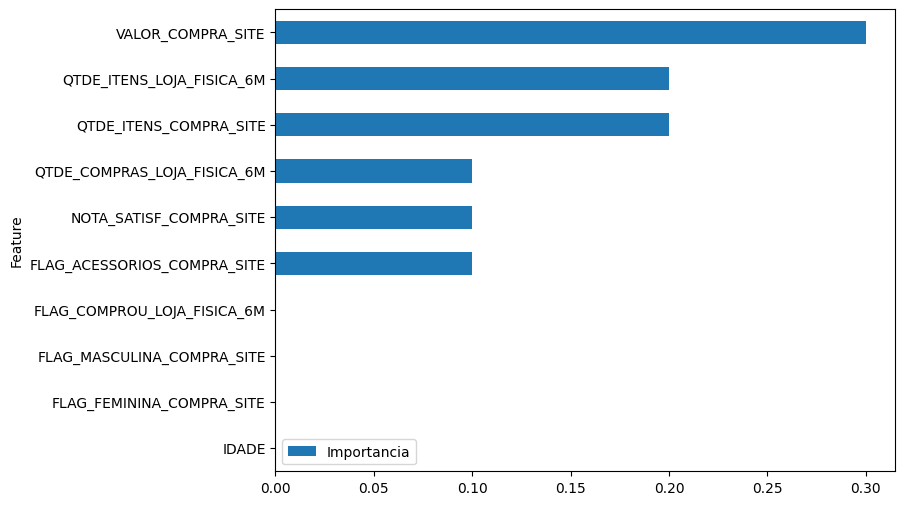

In [31]:
# Gráfico das importâncias de Gini
df_importancias = pd.DataFrame({'Feature': features, 'Importancia': importancias}).sort_values(by = 'Importancia', ascending = True)
df_importancias.plot.barh(x = 'Feature', y = 'Importancia', figsize = (8, 6))
plt.show()

In [32]:
# Cálculo de valores SHAP para as observações
explainer = shap.Explainer(adaboost_1.predict, X)
valores_shap = explainer(X)

ExactExplainer explainer: 1275it [00:57, 19.43it/s]                          


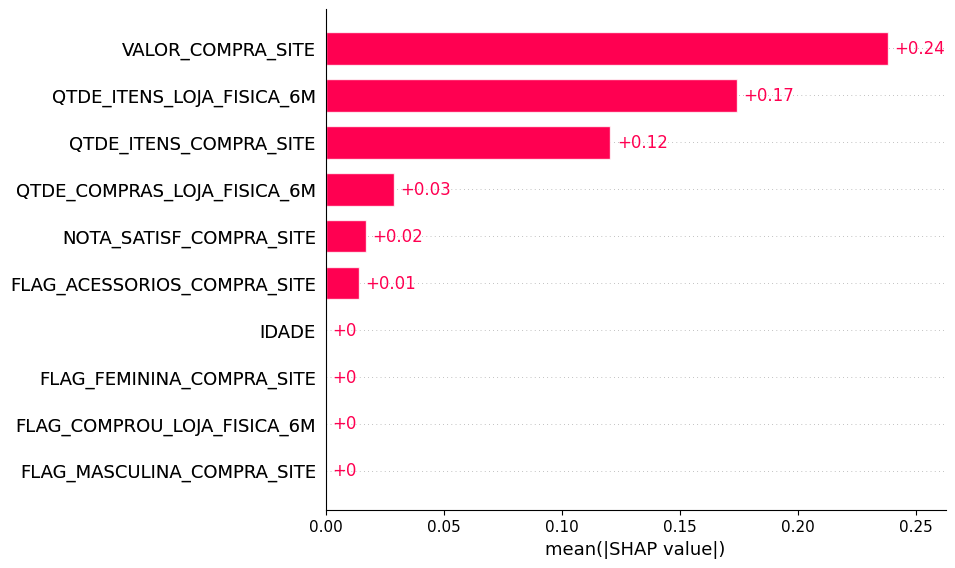

In [33]:
# Gráfico do SHAP absoluto médio por feature
shap.plots.bar(valores_shap)

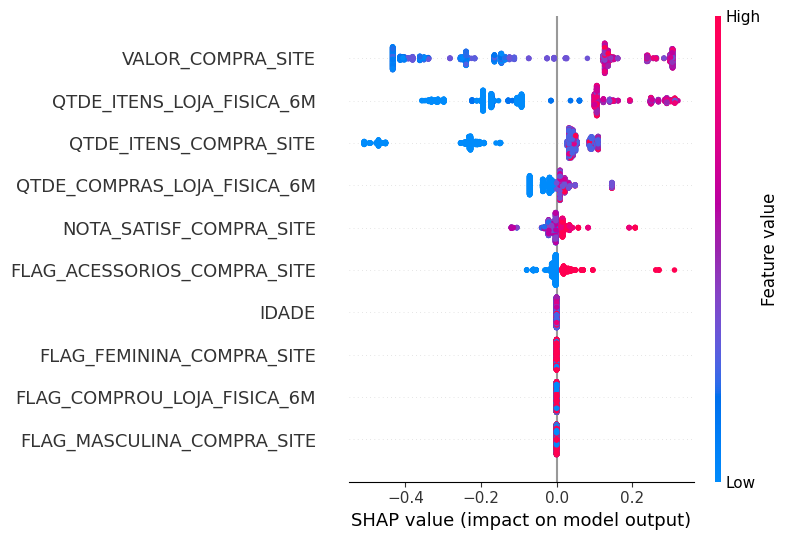

In [34]:
# Gráfico de distribuição de valores SHAP por feature: "enxame de abelhas" (beeswarm plot)
shap.summary_plot(valores_shap)